In [1]:
import os

path = os.listdir('brain_tumor/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 1)
        img = cv2.resize(img, (256,256))
        X.append(img)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

In [5]:
Y

array([0, 0, 0, ..., 1, 1, 1])

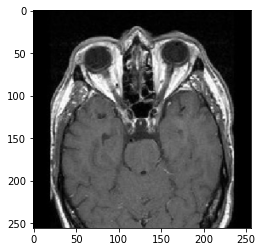

In [6]:
plt.imshow(X[0], cmap='gray')

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, random_state=10,
                                               test_size=.20)

In [8]:
xtrain.shape, xtest.shape

((977, 256, 256, 3), (245, 256, 256, 3))

In [9]:
#Model building starts
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D,BatchNormalization,MaxPool2D
import numpy as np
tf.keras.backend.clear_session()

In [10]:
CNN = Sequential()
#
CNN.add(Conv2D(filters = 64, kernel_size = (3,3), 
                 activation ='relu', input_shape = (256,256,3)))
CNN.add(MaxPool2D(pool_size=(2,2)))
CNN.add(Dropout(0.2))

#
CNN.add(Conv2D(filters = 128, kernel_size = (3,3), 
                 activation ='relu'))
CNN.add(MaxPool2D(pool_size=(2,2)))
CNN.add(Dropout(0.2))

#
CNN.add(Conv2D(filters = 128, kernel_size = (3,3), 
                 activation ='relu'))
CNN.add(MaxPool2D(pool_size=(2,2)))
CNN.add(Dropout(0.2))

#
CNN.add(Conv2D(filters = 128, kernel_size = (3,3), 
                 activation ='relu'))
CNN.add(MaxPool2D(pool_size=(2,2)))
CNN.add(Dropout(0.2))

# 
CNN.add(Flatten())
CNN.add(Dense(256, activation = "relu"))
CNN.add(Dropout(0.25))
CNN.add(Dense(2, activation = "softmax"))

In [12]:
CNN.compile(optimizer='Adam',
            loss='sparse_categorical_crossentropy',
             metrics=["accuracy"])

In [13]:
xx=xtrain
yy=ytrain
# xtrain = tf.reshape(xtrain, shape=[-1, 1])

# ytrain = tf.reshape(ytrain, shape=[-1, 1])
xtrain

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [2, 2, 2],
         [1, 1, 1],
         [1, 1, 1]],

        [[2, 2, 2],
         [2, 2, 2],
         [2, 2, 2],
         ...,
         [3, 3, 3],
         [2, 2, 2],
         [2, 2, 2]],

        ...,

        [[2, 2, 2],
         [2, 2, 2],
         [2, 2, 2],
         ...,
         [3, 3, 3],
         [3, 3, 3],
         [3, 3, 3]],

        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [2, 2, 2],
         [2, 2, 2],
         [2, 2, 2]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [2, 2, 2],
         [2, 2, 2],
         [3, 3, 3]],

        [[0, 0, 0],
         [0,

In [14]:
CNN.fit(xtrain, ytrain, epochs=10, batch_size=20)

Epoch 1/10
49/49 [==============================] - 123s 2s/step - loss: 8.5892 - accuracy: 0.7318
Epoch 2/10
49/49 [==============================] - 136s 3s/step - loss: 0.4082 - accuracy: 0.8383
Epoch 3/10
49/49 [==============================] - 133s 3s/step - loss: 0.2935 - accuracy: 0.8936
Epoch 4/10
49/49 [==============================] - 156s 3s/step - loss: 0.2626 - accuracy: 0.9120
Epoch 5/10
49/49 [==============================] - 141s 3s/step - loss: 0.2575 - accuracy: 0.9069
Epoch 6/10
49/49 [==============================] - 137s 3s/step - loss: 0.2022 - accuracy: 0.9253
Epoch 7/10
49/49 [==============================] - 143s 3s/step - loss: 0.1759 - accuracy: 0.9335
Epoch 8/10
49/49 [==============================] - 138s 3s/step - loss: 0.1050 - accuracy: 0.9560
Epoch 9/10
49/49 [==============================] - 130s 3s/step - loss: 0.0889 - accuracy: 0.9693
Epoch 10/10
49/49 [==============================] - 149s 3s/step - loss: 0.0645 - accuracy: 0.9765


In [16]:
pred = CNN.predict(xtest)

8/8 [==============================] - 6s 707ms/step


In [17]:
misclassified=np.where(ytest!=pred)
misclassified

C:\Users\hp\AppData\Local\Temp\ipykernel_14772\2734279285.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  misclassified=np.where(ytest!=pred)


(array([0], dtype=int64),)

In [18]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  1
[2.8852667e-04 9.9971145e-01] 1


In [19]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

1/1 [==============================] - 0s 44ms/step
[[1.000000e+00 9.456996e-13]]
1/1 [==============================] - 0s 44ms/step
[[0.98565304 0.01434697]]
1/1 [==============================] - 0s 45ms/step
[[9.9999917e-01 8.8192894e-07]]
1/1 [==============================] - 0s 45ms/step
[[9.9978608e-01 2.1395036e-04]]
1/1 [==============================] - 0s 48ms/step
[[9.9999607e-01 3.8936350e-06]]
1/1 [==============================] - 0s 47ms/step
[[9.9966109e-01 3.3886344e-04]]
1/1 [==============================] - 0s 47ms/step
[[0.7714234  0.22857659]]
1/1 [==============================] - 0s 55ms/step
[[0.9746479  0.02535209]]
1/1 [==============================] - 0s 47ms/step
[[9.9989378e-01 1.0620673e-04]]


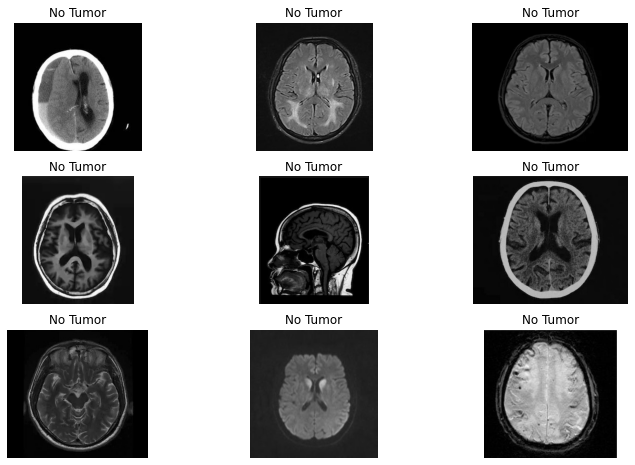

In [38]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('brain_tumor/Testing/no_tumor/'+i,1)
    img1 = cv2.resize(img, (256,256))
    img1 = img1.reshape(1, 256, 256, 3)
    p = CNN.predict(img1)
    print(p)
    if p[0][0]>=.5:
        plt.title(dec[0])
    else:
        plt.title(dec[1])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

1/1 [==============================] - 0s 44ms/step
[[9.7084144e-04 9.9902916e-01]]
0.00097084144
1/1 [==============================] - 0s 45ms/step
[[0.02034493 0.9796551 ]]
0.020344933
1/1 [==============================] - 0s 46ms/step
[[2.8852694e-04 9.9971145e-01]]
0.00028852694
1/1 [==============================] - 0s 45ms/step
[[0.02449558 0.9755044 ]]
0.024495577
1/1 [==============================] - 0s 47ms/step
[[0.04399977 0.95600027]]
0.043999773
1/1 [==============================] - 0s 50ms/step
[[0.3847432 0.6152568]]
0.3847432
1/1 [==============================] - 0s 50ms/step
[[6.556963e-04 9.993443e-01]]
0.0006556963
1/1 [==============================] - 0s 47ms/step
[[9.7084144e-04 9.9902916e-01]]
0.00097084144
1/1 [==============================] - 0s 52ms/step
[[6.556963e-04 9.993443e-01]]
0.0006556963
1/1 [==============================] - 0s 59ms/step
[[6.556963e-04 9.993443e-01]]
0.0006556963
1/1 [==============================] - 0s 49ms/step
[[1.0437617e-

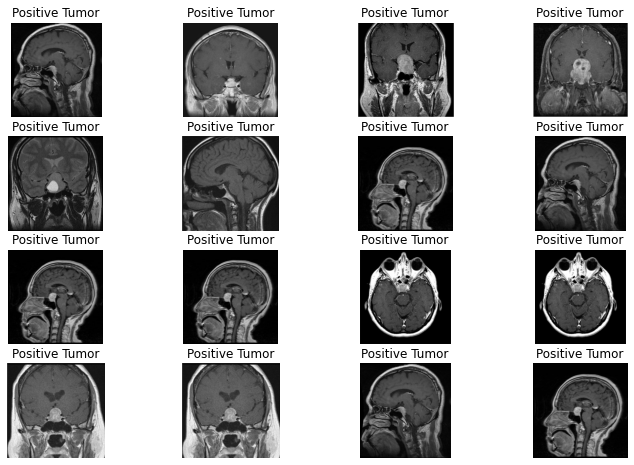

In [42]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('brain_tumor/Testing/pituitary_tumor/'+i,1)
    img1 = cv2.resize(img, (256,256))
    img1 = img1.reshape(1, 256, 256, 3)
    p = CNN.predict(img1)
    print(p)
    print(p[0][0])
    if p[0][0]>=.5:
        plt.title(dec[0])
    else:
        plt.title(dec[1])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [45]:
print(ytest)

[1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1
 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0
 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1
 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1]


In [47]:
pred_y = np.argmax(pred, axis=1)
print(pred_y)

[1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1
 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1]


In [51]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,precision_score, f1_score, recall_score,accuracy_score
print("CNN Model Metrics")
print('Accuracy: ', accuracy_score(ytest, pred_y))
print('Precision: ', precision_score(ytest, pred_y))
print('F1 Score: ', f1_score(ytest, pred_y))
print('Recall Score: ', recall_score(ytest, pred_y))
print('Roc Auc Score: ', roc_auc_score(ytest, pred_y))

CNN Model Metrics
Accuracy:  0.963265306122449
Precision:  0.9532163742690059
F1 Score:  0.973134328358209
Recall Score:  0.9939024390243902
Roc Auc Score:  0.9475685034628124
